## Exploratoy Data Analysis

The purpouse of this notebook is to explore the datasets (train/test). <br>
Once we have a good understanding of the data we can proceed to data preprocessing and model trainning & evaluation.

Lets

- First, look at what kind of data we have <br>
- Assure train/test are in the same format <br>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

In [2]:
train_path = '../data/train.csv'
test_path = '../data/test.csv'

train = pd.read_csv(train_path, parse_dates=['feature_0'])
test = pd.read_csv(test_path, parse_dates=['feature_0'])

train['set'] = 'train'
test['set'] = 'test'

df = pd.concat([train,test],0)

print (df.shape)

(162084, 16)


In [3]:
print (train.shape)
train.head()

(132084, 16)


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target,set
0,403764,2017-01-01 00:00:28.707,74E64D,CIYUI2,B3XNRL,5ZKO7C,IH6J33,ZZXZBD,HFQQ2C,DHJTE3,M5DWTY,6YH7AZ,NaN,NaN,0,train
1,403765,2017-01-01 00:04:42.180,IMO53A,CIYUI2,B3XNRL,3BL2ZU,5QUE6T,ZZXZBD,A4MGEW,DHJTE3,KVR3XZ,MRZO6M,QTIKAW,NaN,0,train
2,403767,2017-01-01 00:36:19.287,ZCCGAX,CIYUI2,B3XNRL,SQZBLJ,SL7NYM,ZZXZBD,2FTKXN,DHJTE3,2EVTBS,NaN,N5WG6L,NaN,0,train
3,403770,2017-01-01 00:42:42.443,IMO53A,CIYUI2,B3XNRL,YLX4RC,LMOOIM,ZZXZBD,A4MGEW,DHJTE3,KVR3XZ,CDHZTB,QTIKAW,NaN,0,train
4,403771,2017-01-01 00:42:46.963,IMO53A,CIYUI2,B3XNRL,WKZU4T,LMOOIM,ZZXZBD,HRO3GC,DHJTE3,KVR3XZ,CDHZTB,QTIKAW,NaN,0,train


In [4]:
print (test.shape)
test.head()

(30000, 15)


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,set
0,630332,2017-10-14 10:34:56.413,HW4GCB,QQDJRM,B3XNRL,PCNXUD,QBVNCF,ZZXZBD,ELAXWJ,HLHYHA,CTX3WJ,NaN,UTZS6M,NaN,test
1,630334,2017-10-14 10:45:16.723,SDQTXW,YY3ZN5,B3XNRL,I3HMTJ,XM4E6O,5SME3J,K2S3XS,IKMDWB,PNQKHH,NaN,M36AKY,NaN,test
2,630336,2017-10-14 10:55:23.963,7HEJZ4,CIYUI2,B3XNRL,MNIAM3,SNY6DV,ZZXZBD,NZLXF6,IKMDWB,PNQKHH,NaN,M36AKY,NaN,test
3,630338,2017-10-14 10:58:47.560,7HEJZ4,CIYUI2,B3XNRL,6ZAOOL,AE5CZL,ZZXZBD,NZLXF6,IKMDWB,PNQKHH,NaN,M36AKY,NaN,test
4,630339,2017-10-14 10:58:53.030,7HEJZ4,CIYUI2,B3XNRL,ZSAEB3,LSC545,ZZXZBD,NZLXF6,IKMDWB,PNQKHH,NaN,M36AKY,NaN,test


** assure ids are unique: ** 

In [5]:
assert df['id'].nunique() == len(df)

It appears we have 13 relevant features. <br>
(event IDs shouldnt be considered as features. although we will check if they present any leakage)
Other features seems to be categorical at first sight, but since they are masked they might be originally numerical. If so, that poses a problem to the process of data analysis/feature engineering.
<br><br>
Lets start by looking at the temporal feature (feature_0).

- Assure the data is pertinent to the same time interval (no outliers)
- check time frame and event distribution
- Check if there is a date correlation to the target (other possible leakage)

In [6]:
df.groupby(['set']).agg({'feature_0':['min','max']})

feature_0                        
                          min                     max
set                                                  
test  2017-10-14 10:34:56.413 2017-12-19 22:42:33.660
train 2017-01-01 00:00:28.707 2017-10-14 10:34:15.413

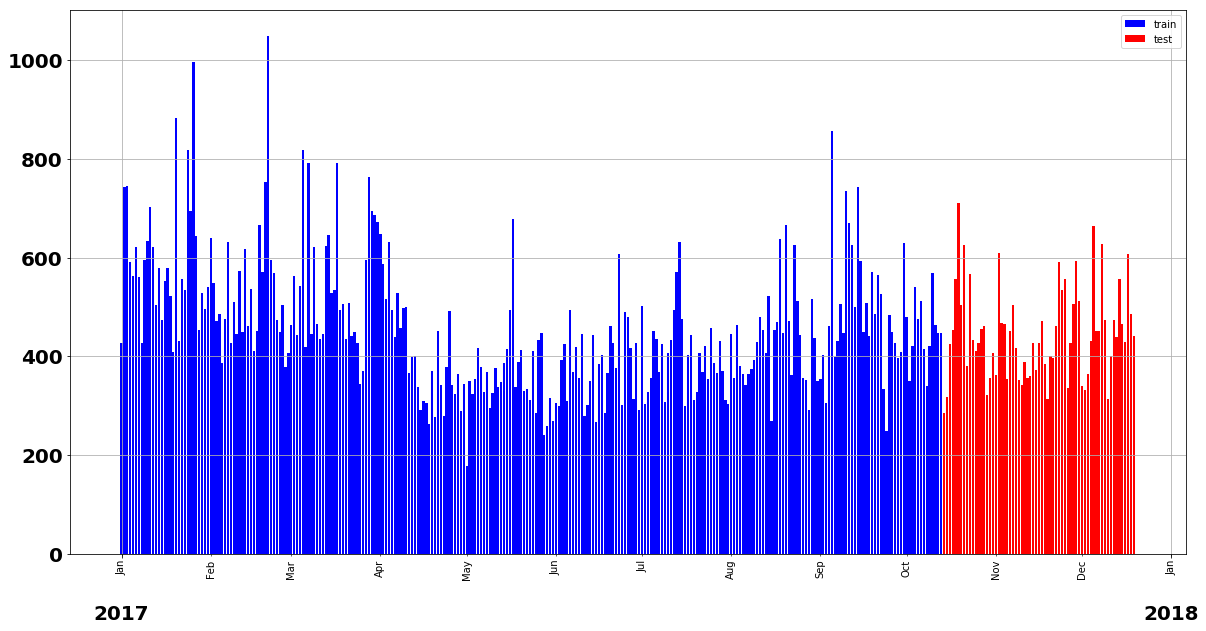

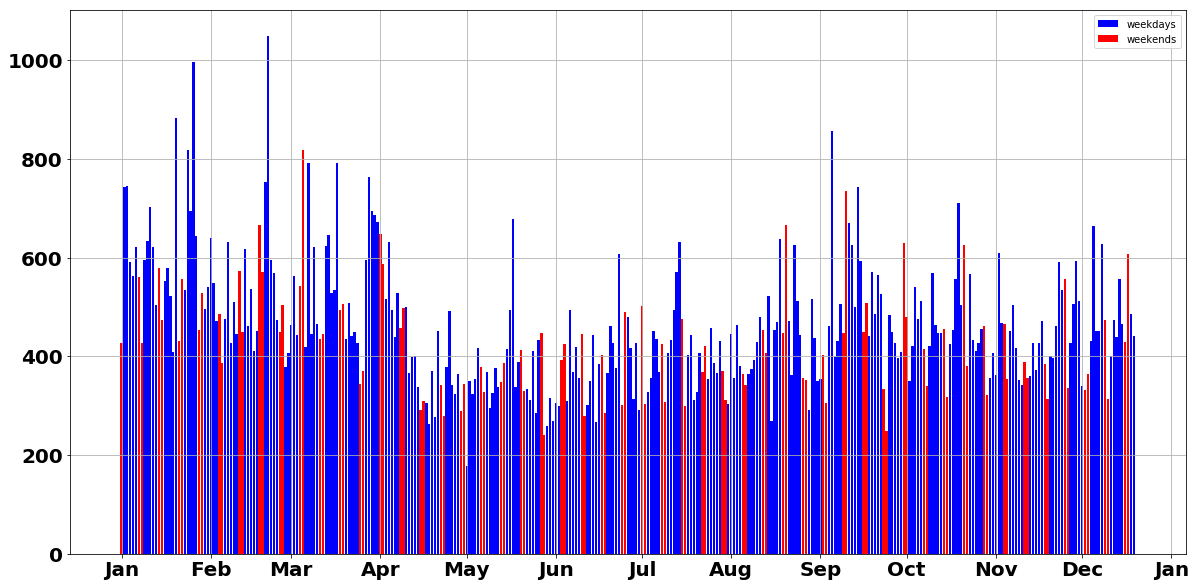

In [7]:
X_train = train.groupby(train['feature_0'].dt.date).apply(len).index
y_train = train.groupby(train['feature_0'].dt.date).apply(len).values

X_test = test.groupby(test['feature_0'].dt.date).apply(len).index
y_test = test.groupby(test['feature_0'].dt.date).apply(len).values

years = mdates.YearLocator()
months = mdates.MonthLocator()

monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label

fig = plt.figure(figsize=(20,10)); ax = fig.add_subplot(111)
ax.bar(X_train, y_train,color='blue')
ax.bar(X_test, y_test, color='red')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.yticks(fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')

plt.grid()
plt.legend(['train','test']);

#######################
#######################
#######################

temp = df[['feature_0']].copy()
temp['weekday'] = temp['feature_0'].map(lambda DT: DT.weekday())

weekdays = temp.loc[temp['weekday'].between(0,4, inclusive=True)]
weekends = temp.loc[temp['weekday'].between(5,6, inclusive=True)]

X_weekday = weekdays.groupby(weekdays['feature_0'].dt.date).apply(len).index
y_weekday = weekdays.groupby(weekdays['feature_0'].dt.date).apply(len).values

X_weekend = weekends.groupby(weekends['feature_0'].dt.date).apply(len).index
y_weekend = weekends.groupby(weekends['feature_0'].dt.date).apply(len).values


months = mdates.MonthLocator()

monthsFmt = mdates.DateFormatter('%b') 

fig = plt.figure(figsize=(20,10)); ax = fig.add_subplot(111)
ax.bar(X_weekday, y_weekday,color='blue')
ax.bar(X_weekend, y_weekend, color='red')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.yticks(fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')

plt.grid()
plt.legend(['weekdays','weekends']);

thats bad. <br>
data was temporally divided and we have no prior information on seasonal effects related to the test set. <br>
<br>
there seems to be a minor periodicity effect; one would expect weekends to have a significantly lower service frequency which doesnt seem to be the case. <br>

lets now look at the other features, <br>
Since we are dealing with masked attributes, we are interested in their value frequency distribution and null entries.

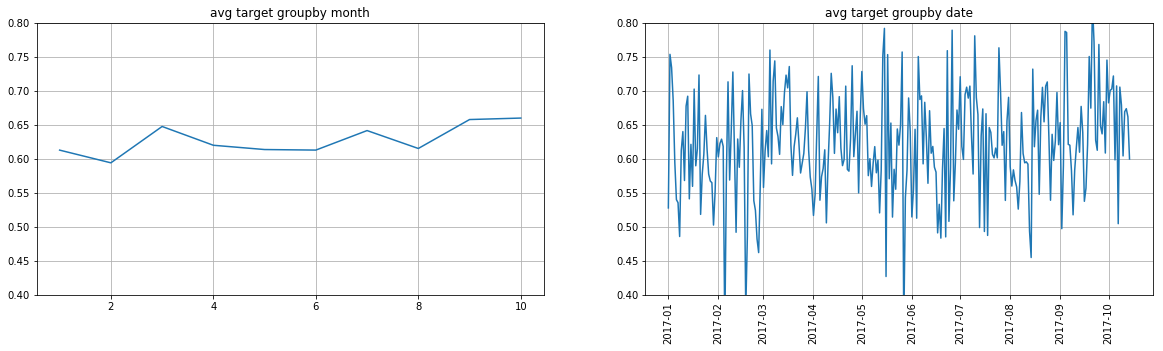

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(121)
rolling_mean_2 = train.sort_values('feature_0').groupby(train['feature_0'].dt.month).agg({'target':'mean'})
plt.plot(rolling_mean_2.loc[rolling_mean_2['target'].notnull()])
plt.grid()
plt.ylim((0.4,0.8))
plt.title('avg target groupby month');

plt.subplot(122)
rolling_mean_2 = train.sort_values('feature_0').groupby(train['feature_0'].dt.date).agg({'target':'mean'})
plt.plot(rolling_mean_2.loc[rolling_mean_2['target'].notnull()])
plt.grid()
plt.ylim((0.4,0.8))
plt.xticks(rotation=90)
plt.title('avg target groupby date');

In [9]:
print ('the target mean is:', train['target'].mean())

the target mean is: 0.6264119802549892


In [10]:
mean_days = train.groupby(train['feature_0'].dt.date).apply(len).mean()
median_days = train.groupby(train['feature_0'].dt.date).apply(len).median()

print ('media eventos por dia: {0:.2f}\nmediana eventos por dia: {1:.2f}'.format(mean_days, median_days))

media eventos por dia: 460.22
mediana eventos por dia: 443.00


There doesnt seem to be an overall trend with target/time. (positive labels dont increase/decrease significantly over time) <br>
Grouped by date is too noisy, problably not enough samples to get ride of statistical variance. <br>
Another usefull visualization might be grouped by week of year. <br>
It would also be interesting to calculate and apply confidence intervals.

Lets now analyse the other features (feature_1 to feature_12)

Our main goals are:

- Identify issues relevant to data preprocessing and/or feature engineering
- Gain insights
- Validate the data

Our main approaches are:

- Null values
- Distributions
- Correlations

Remembering its important to take into account both the train and the test sets.

In [11]:
train.isnull().sum() / len(train) * 100

id             0.000000
feature_0      0.000000
feature_1      0.000000
feature_2      0.000000
feature_3      0.000000
feature_4      0.000000
feature_5      0.004543
feature_6      0.000000
feature_7      0.000000
feature_8      4.388874
feature_9      5.410194
feature_10    59.942158
feature_11    31.554163
feature_12    86.472245
target         0.000000
set            0.000000
dtype: float64

In [12]:
test.isnull().sum() / len(test) * 100

id             0.000000
feature_0      0.000000
feature_1      0.000000
feature_2      0.000000
feature_3      0.000000
feature_4      0.000000
feature_5      0.000000
feature_6      0.000000
feature_7      0.000000
feature_8      3.030000
feature_9      3.683333
feature_10    58.110000
feature_11    33.156667
feature_12    86.946667
set            0.000000
dtype: float64

In [13]:
train[['feature_{}'.format(I) for I in np.arange(1,13)]].nunique() / len(train) * 100

feature_1     0.023470
feature_2     0.037855
feature_3     0.001514
feature_4     4.141304
feature_5     0.627631
feature_6     0.003028
feature_7     0.266497
feature_8     0.007571
feature_9     0.018927
feature_10    0.002271
feature_11    0.014385
feature_12    0.003785
dtype: float64

In [14]:
test[['feature_{}'.format(I) for I in np.arange(1,13)]].nunique() / len(test) * 100

feature_1      0.103333
feature_2      0.170000
feature_3      0.006667
feature_4     13.036667
feature_5      2.490000
feature_6      0.013333
feature_7      1.050000
feature_8      0.033333
feature_9      0.083333
feature_10     0.010000
feature_11     0.063333
feature_12     0.016667
dtype: float64

train/test null ratio looks very similar. <br>
feature_5 has null cases on train but none on test. thats not a problem. the other way around might be (since the model wouldnt have learned what a null value means). <br>
there are many ways to treat NULL data, more if you also consider numerical features (which is not the case). <br>

Henk Van Veen (Nubank Data Scientist // Kaggle Grandmaster - aka triskelion) has a great presentation on the topic. (https://www.slideshare.net/HJvanVeen/feature-engineering-72376750)<br>

Now, lets look at frequency distributions.

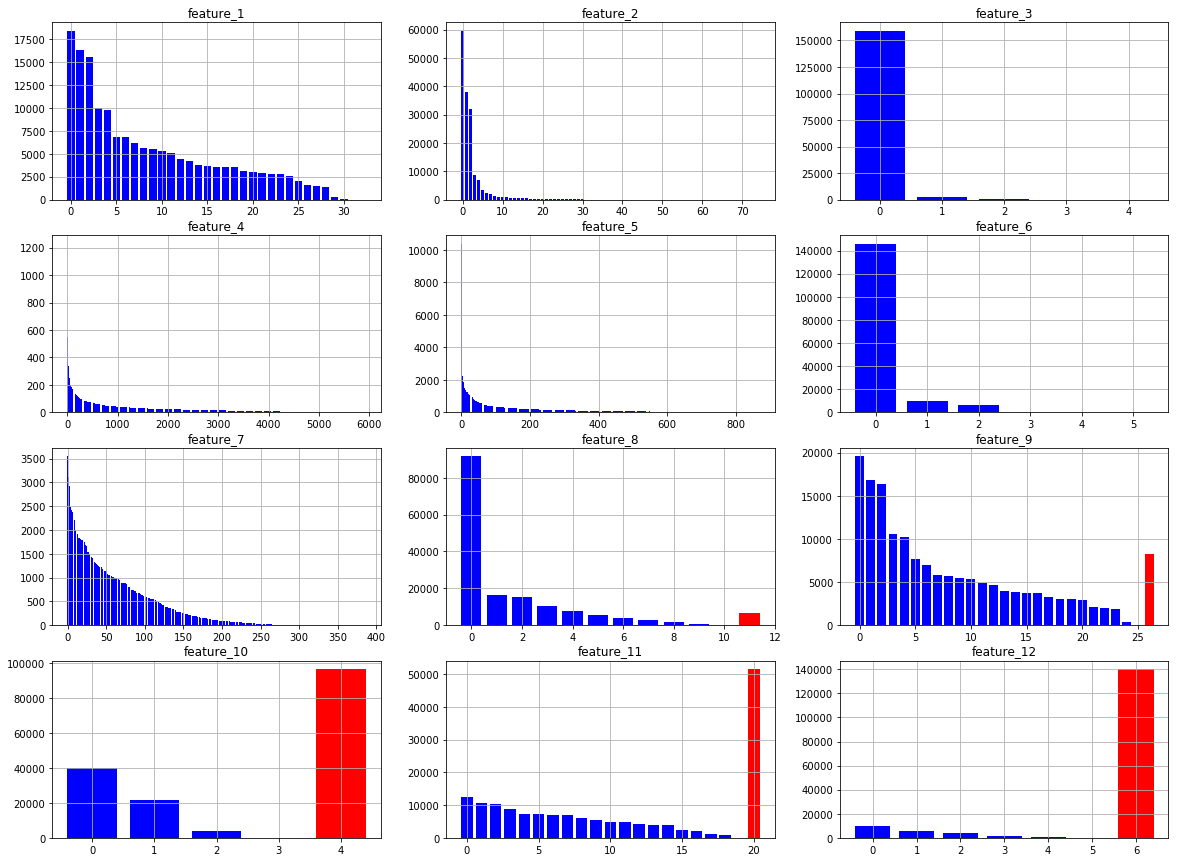

In [15]:
plt.figure(figsize=(20,15))

for I in np.arange(1,13):

    plt.subplot(4,3,I)
    
    data = df['feature_{}'.format(I)].value_counts()
    
    values = data.values
    X = np.arange(len(values))
    
    plt.bar(X, values, color='blue')
    plt.bar(len(values)+1, df['feature_{}'.format(I)].isnull().sum(), color='red')
    
    plt.title('feature_{}'.format(I))
    plt.grid();

features 8 and 9 have a reasonably low nan count - that might indicate an older model of equipment which does not collect some sort of data on the event, or even (if we are lucky) faulty machinery. <br>
features 10,11 and 12 have all really high NaN counts. It would be nice to know the reason behind that. <br>
features 4,5,7 are most likelly numerical/continuous features that got masked in this datase, due their high different values possibility. (although other features are also candidates for that).

some features might also be related to temporal factors.

feature 1 has 31 unique possible values (day of month of next scheduled report?) <br>
feature 12 has 5 unique possible values and NaN (day of week of next scheduled report or maintenance visit?) <br>
feature 11 has nearly 24 unique possible values (hour of day of next scheduled report? non applyable for most cases?)

features 3 and 6 are very skewed.
usually if the target variable is also very skewed that might be a very correlated feature.

Its also nice to notice that some distributions are very similar (4 and 5, 3 and 6, 1 and 9).

Michael Jahrer (the famous netflix competition winner) applied auto encoders to noisy categorical masked datasets in order to sort relevant features and values from trash - something not seem before on that kind of competition, to achieve a solid win - you can read more @ https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/44629

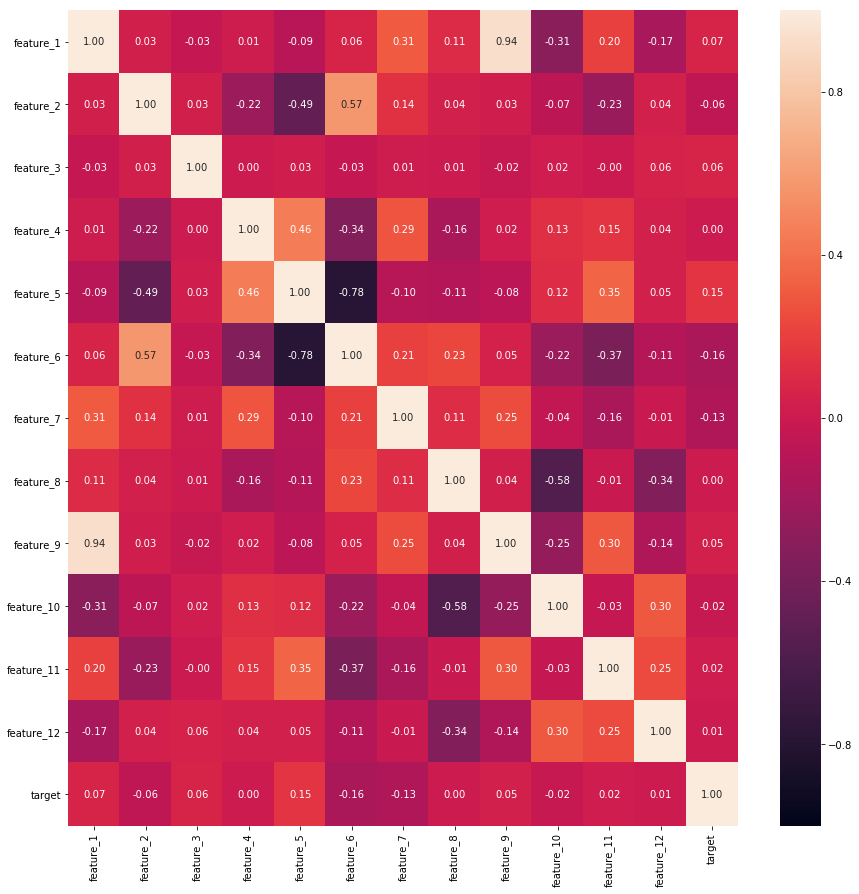

In [16]:
df_vc = train[['feature_{}'.format(I) for I in np.arange(1,13)]].copy().fillna('NULL')

for col in df_vc.columns:

    temp_dict = dict(df_vc[col].value_counts())

    df_vc[col] = df_vc[col].map(temp_dict)
    
df_vc['target'] = train['target']

plt.figure(figsize=(15,15))
sns.heatmap(df_vc.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.yticks(rotation=0);

In [17]:
corr_values = [value for value in np.hstack(df_vc.corr()['target'].values) if value !=1]

In [18]:
print("max corr:", max(corr_values))
print("max corr:", min(corr_values))

max corr: 0.148927928367
max corr: -0.161521935237


Correlations are overall low values. <br>
There are two features which frequency count has no correlation at all with target. (features 4 and 8) <br>
That doesnt necessarily imply the feature itself has no correlation, just that the transformation method is not ideal. <br>

lets check for id leakage

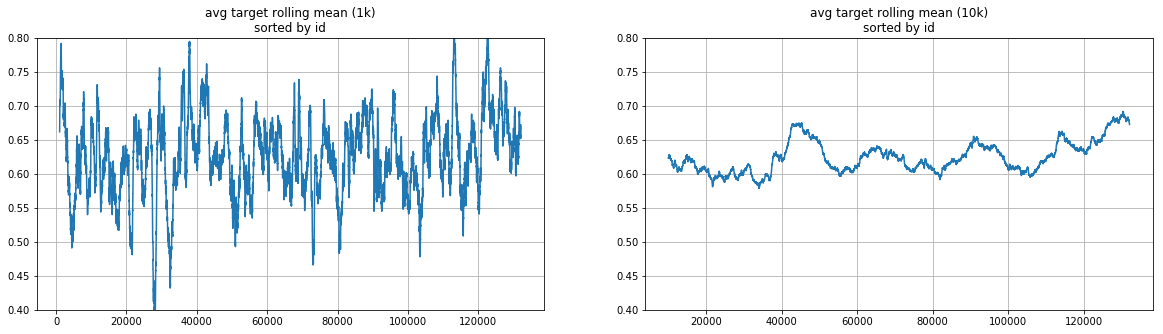

In [19]:
plt.figure(figsize=(20,5))

plt.subplot(121)
rolling_mean = train.sort_values('id')[['target']].rolling(int(1e3)).mean()
plt.plot(rolling_mean.loc[rolling_mean['target'].notnull()])
plt.grid()
plt.ylim((0.4,0.8))
plt.title('avg target rolling mean (1k)\nsorted by id');

plt.subplot(122)
rolling_mean = train.sort_values('id')[['target']].rolling(int(1e4)).mean()
plt.plot(rolling_mean.loc[rolling_mean['target'].notnull()])
plt.grid()
plt.ylim((0.4,0.8))
plt.title('avg target rolling mean (10k)\nsorted by id');